# سوال سوم

تصویر cameraman را در ورودی خوانده و نویزهای گاوسین، فلفل نمک)pepper and Salt )را به آن اعمال کنید. 
سپس فیلترهای میانگین ، میانه و گاوسین را به تصاویر تخریب شده اعمال کنید. اندازی فیلترها در سایزهای 3در3 و 5در5 در نظر 
گرفته شود. تاثیر هرکدام از فیلترها را گزارش کنید. روند خواسته شده را برای تصویر babon نیز تکرار نمایید. چه تفاوتی در اعمال 
فیلترهای متفاوت در این دو تصویر مشاهده می نمایید، تفاوت ها را در قالب گزارش تشریح نمایید. 
پیش از اعمال فیلترهای خواسته شده در قسمت قبل تصویر را با استفاده از یک تابع لگاریتمی نگاشت داده و سپس فیلتر 
نمایید. بعد از اعمال فیلتر مکانی با استفاده از معکوس تابع لگاریتمی تصویر را بازسازی نموده و اثر اعمال تابع لگاریتمی را در 
کاهش نویز بررسی نمایید

In [1]:
import numpy
import random
from copy import deepcopy
import cv2
from skimage.util import random_noise
import matplotlib.pyplot as plt

ابتدا یک تابع برای اعمال نویز salt and paper تعریف میکنیم. طرز کار این تابع به این شکل است که یک تصویر و حداقل و حداکثر میزان نمک فلفل ها را میگیرد و بعد تعداد پیکسل هایی که باید تغییر کنند را با توجه به محدودیت ها بدست می اورد و بعد مقدار آن نقطه در عکس را تغییر میدهد.

In [2]:
def ApplySaltAndPepper(img , upBound:int , minBound:int = 300):
    image = deepcopy(img)
    col = len(image[0])
    row = len(image)

    numberOfPixels = random.randint(minBound , upBound)

    for num in range(numberOfPixels):
        x = random.randint(0 , col - 1)
        y = random.randint(0 , row - 1)

        image[x , y] = 0
    
    numberOfPixels = random.randint(300 , upBound)

    for num in range(numberOfPixels):
        x = random.randint(0 , col - 1)
        y = random.randint(0 , row - 1)

        image[x , y] = 255
    

    return image

در این بخش یک تابع برای اعمال نویز های گوسی میسازیم که به صورت زیر با استفاده از تابع از پیش ساخته شده انجام میشود و جنس مقادیر را به float32 در نهایت تغییر میدهد

In [3]:
def ApplyGuassianNoise(img) :
    image =  random_noise(img , mode='gaussian', seed=None, clip=True)
    return numpy.float32(image)

حال برای فیلتر ها توابع زیر را تعریف میکنیم

ابتدا تابعی برای اعمال فیلتر گوسی میسازیم که به شرح زیر است و با استفاده از توابع از پیش ساخته شده نوشته شده است.

In [4]:
def ApplyGaussianFilter(size:int , img):
    image = cv2.GaussianBlur(img , (size , size) , 0)

    return image

حال برای اعمال فلتر Mean تابعی به شرح زیر تعریف میکنیم. طرز کار این متد به این شکل است که یک ارایه دوبعدی در سایز داده شده که فقط با اعداد 1 پرشده است تولید میکند و با استفاده از تابع filter2D کتابخانه openCv این فیلتر را بر روی عکس اعمال کرده و تصویر جدید را بازمیگرداند

In [5]:
def ApplyMeanFilter(size:int , img):
    filter =  numpy.ones((size,size),numpy.float32)/(size ** 2)
    image = deepcopy(img)
    image = cv2.filter2D(image , -1 , filter)

    return image

در مرحله بعد تابعی برای اعمال فیلتر median تعریف میکنیم. که با استفاده از توابع از پیش ساخته شده نوشته شده است.

In [6]:
def ApplyMedianFilter(size:int , img):
   image = cv2.medianBlur(img , size)
   return image

در این قسمت با استفاده از توابع بالا، فیلتر ها و نویز ها را بر روی تصویر ها اعمال میکنیم

در مرحله اول بر روی تصویر cameraman نویز گوسی را اعمال میکنیم

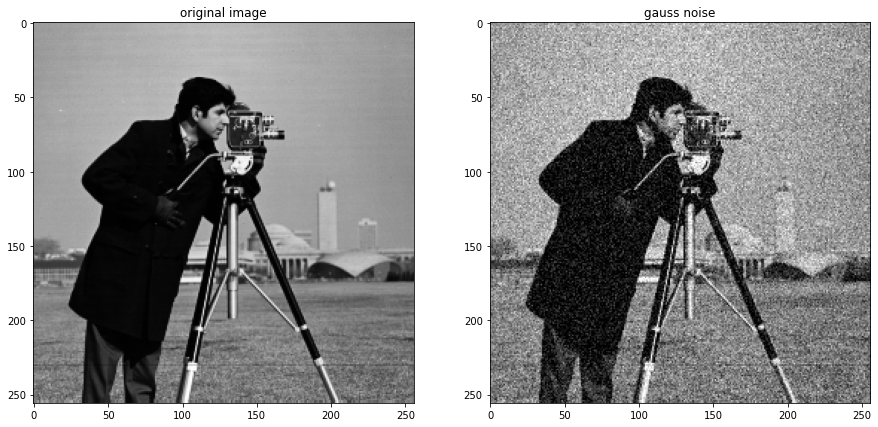

In [7]:
cameramanImage = cv2.imread("../cameraman.tif" , cv2.IMREAD_GRAYSCALE)
gaussCameraman = ApplyGuassianNoise(cameramanImage)

fig , subplot = plt.subplots(1 , 2 , figsize=(15, 15))

subplot[0].imshow(cameramanImage , cmap = "gray")
subplot[0].set_title("original image")

subplot[1].imshow(gaussCameraman , cmap = "gray")
subplot[1].set_title("gauss noise")

plt.show()


حال به ترتیب فیلتر های mean و median و گوسی را در سایز های 3 و 5 اعمال میکنیم

ابتدا از فیلتر mean شروع میکنیم

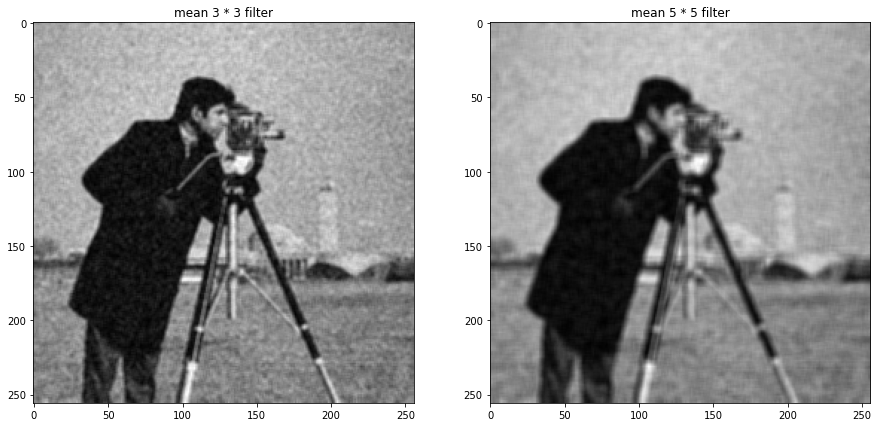

In [8]:
blur3gaussCameraMan = ApplyMeanFilter(3 , gaussCameraman)
blur5gaussCameraMan = ApplyMeanFilter(5 , gaussCameraman)

fig , subplot = plt.subplots(1 , 2 , figsize=(15, 15))

subplot[0].imshow(blur3gaussCameraMan , cmap = "gray")
subplot[0].set_title("mean 3 * 3 filter")

subplot[1].imshow(blur5gaussCameraMan , cmap = "gray")
subplot[1].set_title("mean 5 * 5 filter")

plt.show()

حال نوبت به فیلتر median میرسد که در سایز های 3 و 5 برروی تصویر نویز دار اعمال شود

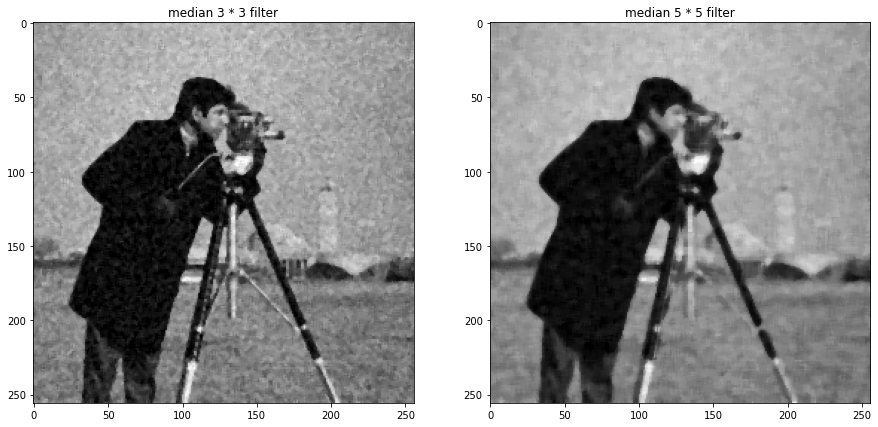

In [9]:
blur3MedianCameraMan = ApplyMedianFilter(3 , gaussCameraman)
blure5MedianCameraMan = ApplyMedianFilter(5 , gaussCameraman)

fig , subplot = plt.subplots(1 , 2 , figsize=(15, 15))

subplot[0].imshow(blur3MedianCameraMan , cmap = "gray")
subplot[0].set_title("median 3 * 3 filter")

subplot[1].imshow(blure5MedianCameraMan , cmap = "gray")
subplot[1].set_title("median 5 * 5 filter")

plt.show()

در مرحله بعد فیلتر گوسی را بر روی تصویر نویز دار شده اعمال میکنیم

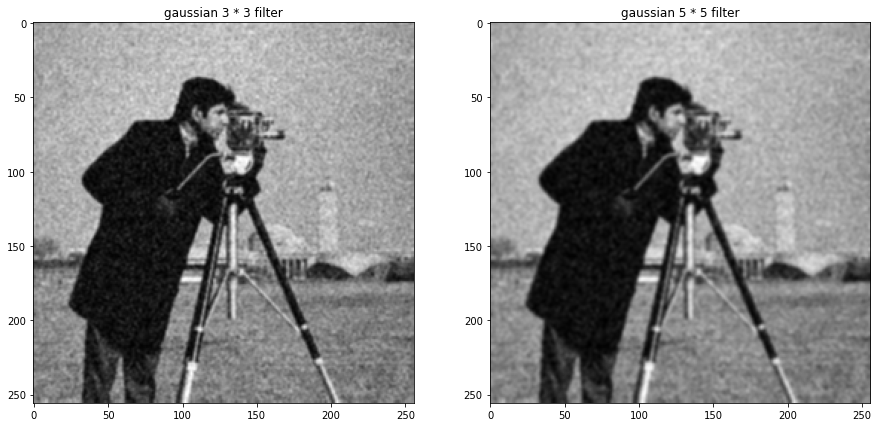

In [10]:
blur3GaussianMan = ApplyGaussianFilter(3 , gaussCameraman)
blur5GaussianMan = ApplyGaussianFilter(5 , gaussCameraman)

fig , subplot = plt.subplots(1 , 2 , figsize=(15, 15))

subplot[0].imshow(blur3GaussianMan , cmap = "gray")
subplot[0].set_title("gaussian 3 * 3 filter")

subplot[1].imshow(blur5GaussianMan , cmap = "gray")
subplot[1].set_title("gaussian 5 * 5 filter")

plt.show()

حال تصویر cameraman را با نویز فلفل نمک نویز دار میکنیم و سپس فلتر ها را بر روی آن اعمال میکنیم

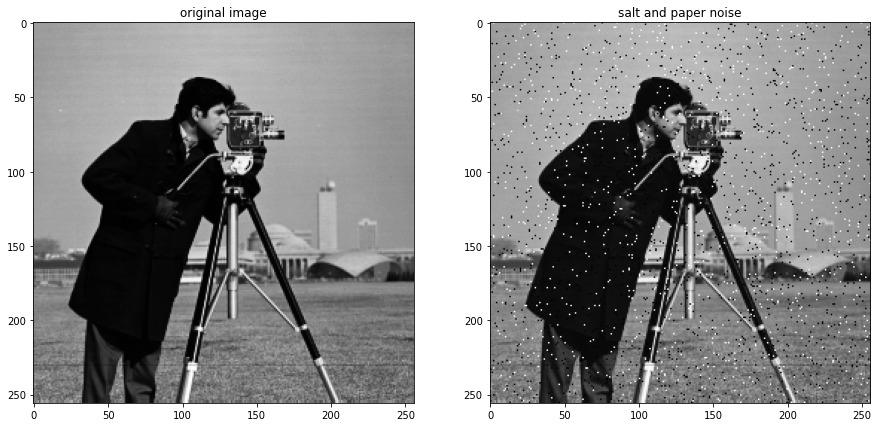

In [11]:
saltyCameraman = ApplySaltAndPepper(cameramanImage , 1500)

fig , subplot = plt.subplots(1 , 2 , figsize=(15, 15))

subplot[0].imshow(cameramanImage , cmap = "gray")
subplot[0].set_title("original image")

subplot[1].imshow(saltyCameraman , cmap = "gray")
subplot[1].set_title("salt and paper noise")

plt.show()


حال به ترتیب فیلتر های mean و median و گوسی را در سایز های 3 و 5 اعمال میکنیم

ابتدا از فیلتر mean شروع میکنیم

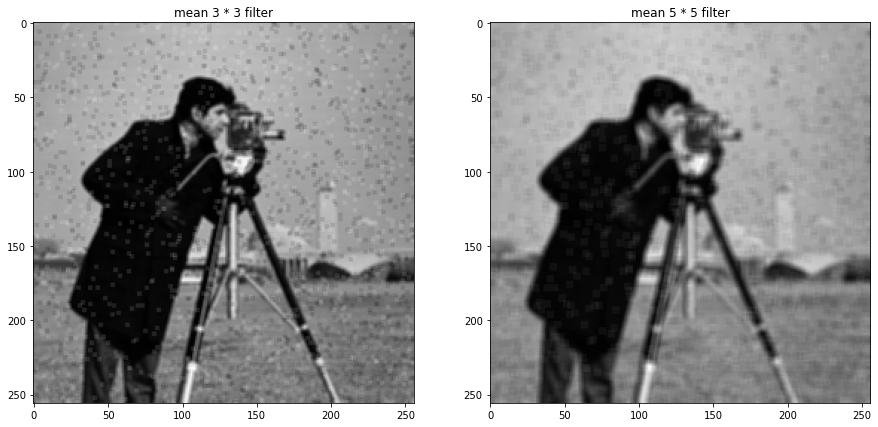

In [12]:
blur3SaltyCameraMan = ApplyMeanFilter(3 , saltyCameraman)
blur5SaltyCameraMan = ApplyMeanFilter(5 , saltyCameraman)

fig , subplot = plt.subplots(1 , 2 , figsize=(15, 15))

subplot[0].imshow(blur3SaltyCameraMan , cmap = "gray")
subplot[0].set_title("mean 3 * 3 filter")

subplot[1].imshow(blur5SaltyCameraMan , cmap = "gray")
subplot[1].set_title("mean 5 * 5 filter")

plt.show()

حال نوبت به فیلتر median میرسد که در سایز های 3 و 5 برروی تصویر نویز دار اعمال شود

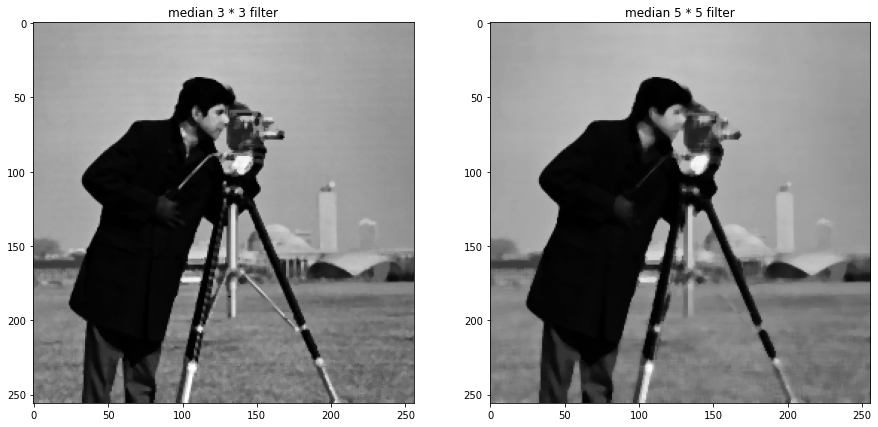

In [13]:
blur3MedianCameraMan = ApplyMedianFilter(3 , saltyCameraman)
blure5MedianCameraMan = ApplyMedianFilter(5 , saltyCameraman)

fig , subplot = plt.subplots(1 , 2 , figsize=(15, 15))

subplot[0].imshow(blur3MedianCameraMan , cmap = "gray")
subplot[0].set_title("median 3 * 3 filter")

subplot[1].imshow(blure5MedianCameraMan , cmap = "gray")
subplot[1].set_title("median 5 * 5 filter")

plt.show()

در مرحله بعد فیلتر گوسی را بر روی تصویر نویز دار شده اعمال میکنیم

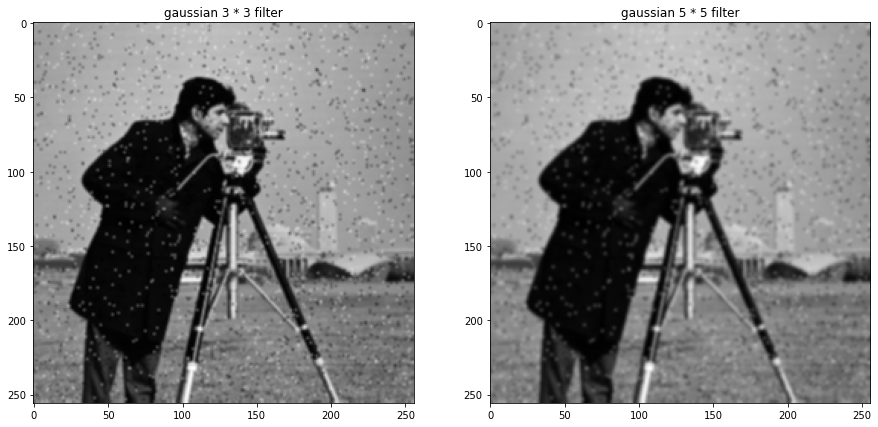

In [14]:
blur3GaussianMan = ApplyGaussianFilter(3 , saltyCameraman)
blur5GaussianMan = ApplyGaussianFilter(5 , saltyCameraman)

fig , subplot = plt.subplots(1 , 2 , figsize=(15, 15))

subplot[0].imshow(blur3GaussianMan , cmap = "gray")
subplot[0].set_title("gaussian 3 * 3 filter")

subplot[1].imshow(blur5GaussianMan , cmap = "gray")
subplot[1].set_title("gaussian 5 * 5 filter")

plt.show()

با توجه به فیلتر های اعمال شده میتوان دریافت که فیلتر های مختلف بر روی نویز گوسی تاثیر قابل محسوس و متفاوتی ندارند ولی با این حال شاید بتوان گفت فیلتر های گوسی و mean برروی این نویز تاثیر بهتری دارند.
اما درمورد نویز فلفل نمک فیلتر median با سایز 3 به طور کامل این نوع نویز را از بین میبرد و کیفیت تصویر نیز در این فیلتر به صورت قابل تحملی حفظ شده است. این فیلتر نسبت به دو فیلتر دیگر تاثیر بهتری دارد و دو فیلتر دیگر زیاد در ازبین بردن این نویز تاثیر خاصی ندارند و فقط باعث کمی محو شدگی میشوند.

حال به سراغ تصویر بابون میرویم و در ابتدا با نویز گوسی شروع میکنیم

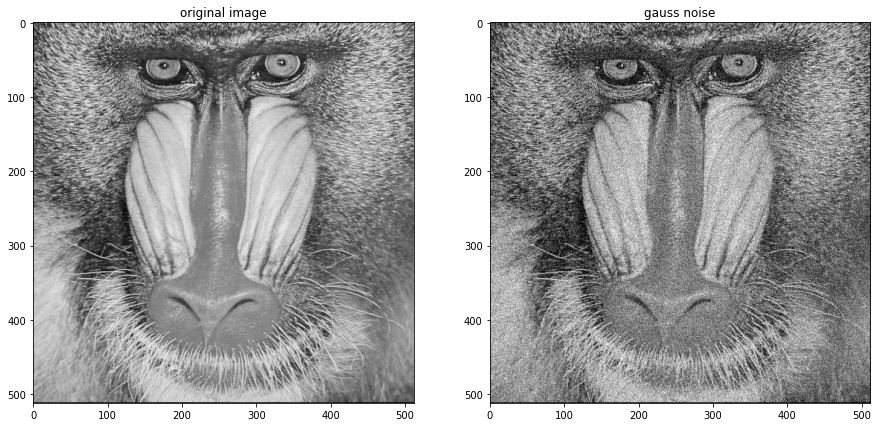

In [15]:
babonImage = cv2.imread("../mandril.tiff" , cv2.IMREAD_GRAYSCALE)
gaussbabon = ApplyGuassianNoise(babonImage)

fig , subplot = plt.subplots(1 , 2 , figsize=(15, 15))

subplot[0].imshow(babonImage , cmap = "gray")
subplot[0].set_title("original image")

subplot[1].imshow(gaussbabon , cmap = "gray")
subplot[1].set_title("gauss noise")

plt.show()

حال به سراغ اعمال فیلتر mean میرویم

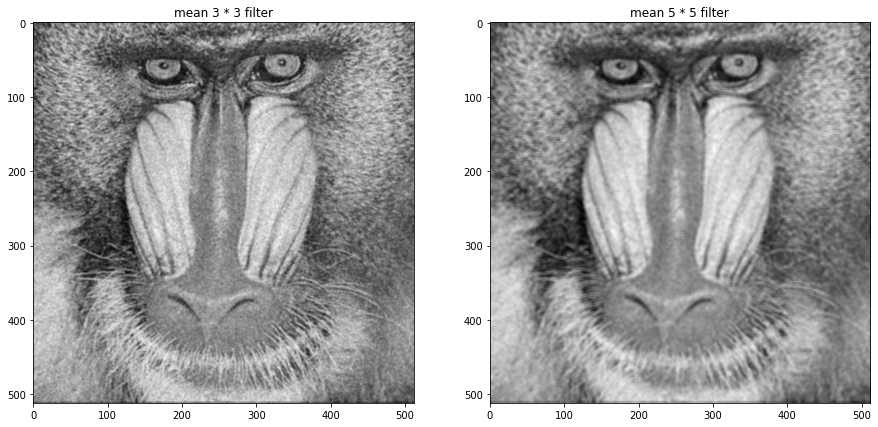

In [16]:
blur3gaussBabon = ApplyMeanFilter(3 , gaussbabon)
blur5gaussBabon = ApplyMeanFilter(5 , gaussbabon)

fig , subplot = plt.subplots(1 , 2 , figsize=(15, 15))

subplot[0].imshow(blur3gaussBabon , cmap = "gray")
subplot[0].set_title("mean 3 * 3 filter")

subplot[1].imshow(blur5gaussBabon , cmap = "gray")
subplot[1].set_title("mean 5 * 5 filter")

plt.show()

در این مرحله به سراغ فیلتر median میرویم

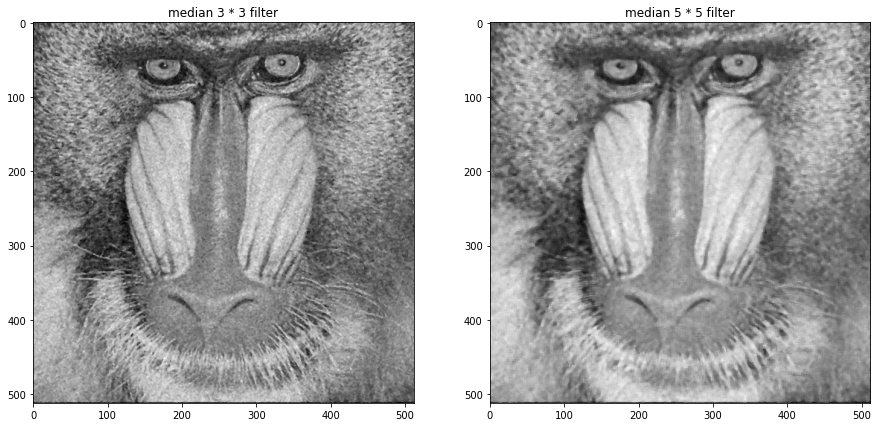

In [17]:
blur3MedianBabon = ApplyMedianFilter(3 , gaussbabon)
blure5MedianBabon = ApplyMedianFilter(5 , gaussbabon)

fig , subplot = plt.subplots(1 , 2 , figsize=(15, 15))

subplot[0].imshow(blur3MedianBabon , cmap = "gray")
subplot[0].set_title("median 3 * 3 filter")

subplot[1].imshow(blure5MedianBabon , cmap = "gray")
subplot[1].set_title("median 5 * 5 filter")

plt.show()

در مرحله اخر فیلتر گوسی را بر روی تصویر نویز دار شده اعمال میکنیم

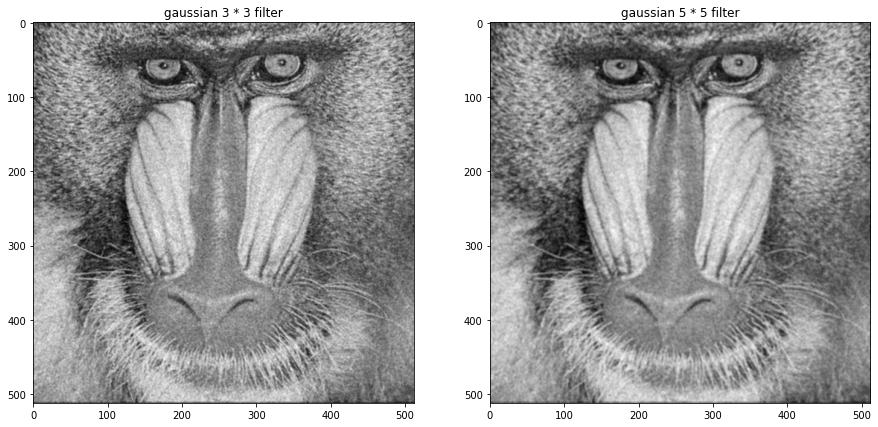

In [18]:
blur3GaussianBabon = ApplyGaussianFilter(3 , gaussbabon)
blur5GaussianBabon = ApplyGaussianFilter(5 , gaussbabon)

fig , subplot = plt.subplots(1 , 2 , figsize=(15, 15))

subplot[0].imshow(blur3GaussianBabon , cmap = "gray")
subplot[0].set_title("gaussian 3 * 3 filter")

subplot[1].imshow(blur5GaussianBabon , cmap = "gray")
subplot[1].set_title("gaussian 5 * 5 filter")

plt.show()

حال نویز فلفل نمک را بر روی تصویر بابون اعمال میکنیم و بعد به سراغ فیلتر ها میرویم

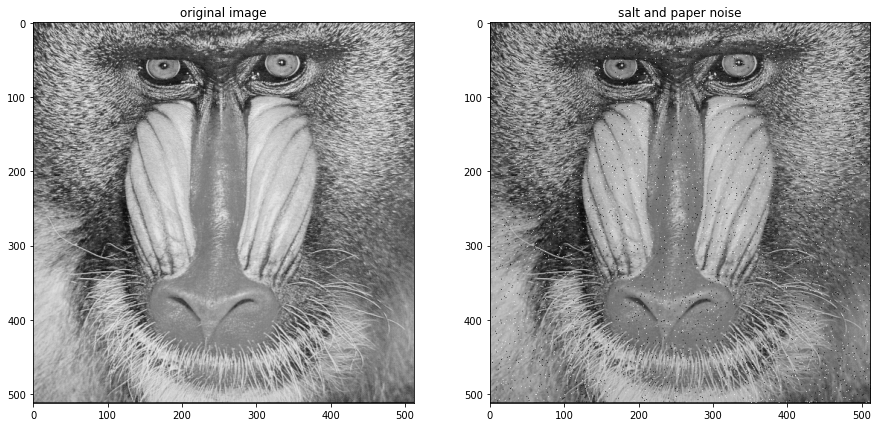

In [19]:
saltybabon = ApplySaltAndPepper(babonImage , 3000 ,1500)

fig , subplot = plt.subplots(1 , 2 , figsize=(15, 15))

subplot[0].imshow(babonImage , cmap = "gray")
subplot[0].set_title("original image")

subplot[1].imshow(saltybabon , cmap = "gray")
subplot[1].set_title("salt and paper noise")

plt.show()

حال پس از اعمال نویز فلفل نمک، به سراغ اعمال فیلتر mean میرویم

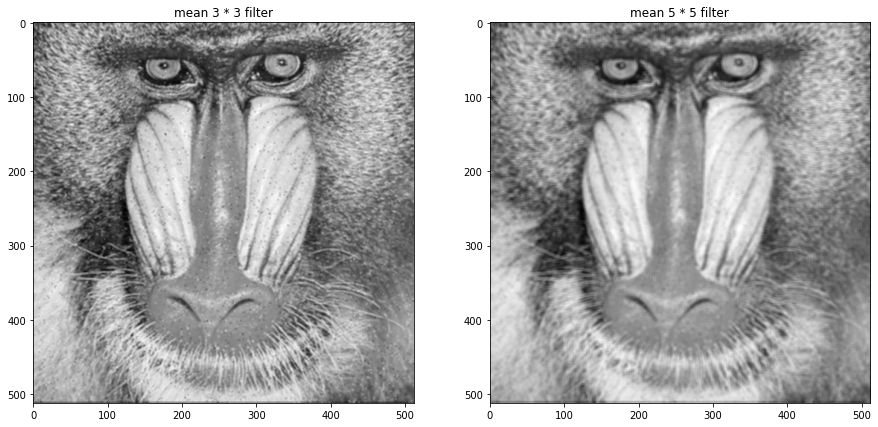

In [20]:
blur3SaltyBabon = ApplyMeanFilter(3 , saltybabon)
blur5SaltyBabon = ApplyMeanFilter(5 , saltybabon)

fig , subplot = plt.subplots(1 , 2 , figsize=(15, 15))

subplot[0].imshow(blur3SaltyBabon , cmap = "gray")
subplot[0].set_title("mean 3 * 3 filter")

subplot[1].imshow(blur5SaltyBabon , cmap = "gray")
subplot[1].set_title("mean 5 * 5 filter")

plt.show()

در این بخش به سراغ اعمال فیلتر median بر روی تصویر هستیم

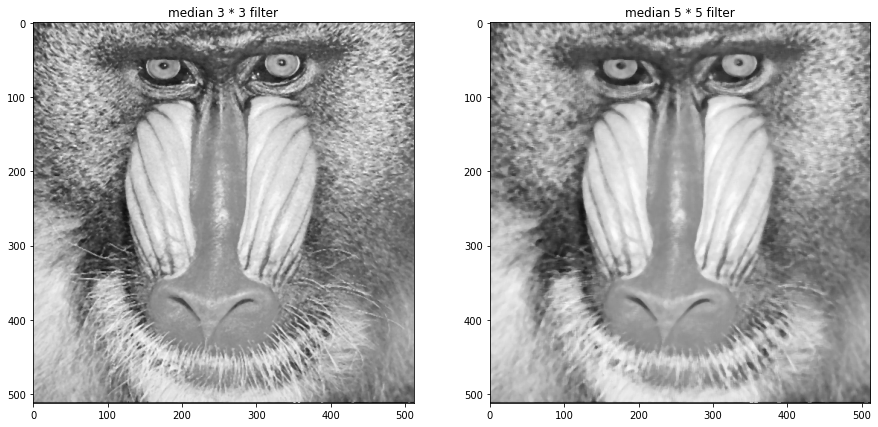

In [21]:
blur3MedianBabon = ApplyMedianFilter(3 , saltybabon)
blure5MedianBabon = ApplyMedianFilter(5 , saltybabon)

fig , subplot = plt.subplots(1 , 2 , figsize=(15, 15))

subplot[0].imshow(blur3MedianBabon , cmap = "gray")
subplot[0].set_title("median 3 * 3 filter")

subplot[1].imshow(blure5MedianBabon , cmap = "gray")
subplot[1].set_title("median 5 * 5 filter")

plt.show()

و در مرحله اخر به سراغ اعمال فیلتر گوسی بر روی تصویر مذکور هستیم

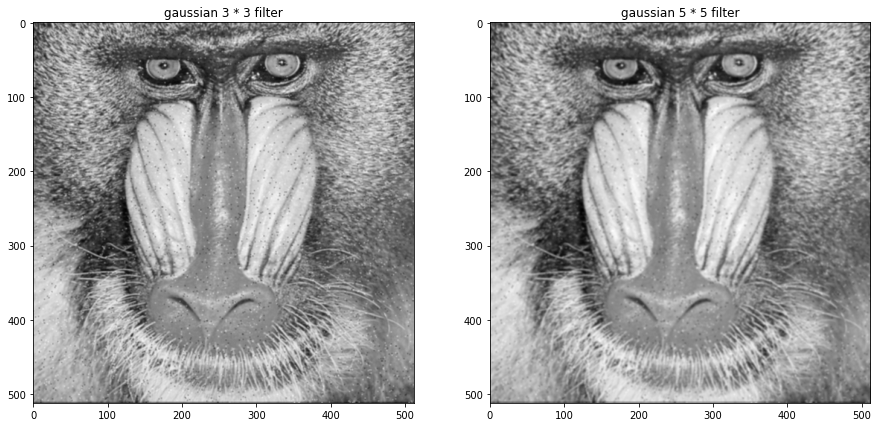

In [22]:
blur3GaussianBabon = ApplyGaussianFilter(3 , saltybabon)
blur5GaussianBabon = ApplyGaussianFilter(5 , saltybabon)

fig , subplot = plt.subplots(1 , 2 , figsize=(15, 15))

subplot[0].imshow(blur3GaussianBabon , cmap = "gray")
subplot[0].set_title("gaussian 3 * 3 filter")

subplot[1].imshow(blur5GaussianBabon , cmap = "gray")
subplot[1].set_title("gaussian 5 * 5 filter")

plt.show()

چیزی که مشاهده میکنیم در این تصاویر مربوط به نویز گوسی این است که فیلتر های اعمال شده بر روی تصویر دارای نویز گوسی باعث کم رنگ شدن و محو تر شدن نویز ها شدند ولی نمیتوان گفت یکی از این فیلتر ها به صورت خاصی باعث از بین رفتن نویز میشود. 
اما در نویز فلفل نمک این تاثیر خوب و به خصوص را میتوان در اعمال فیلتر median با سایز 3 مشاهده کرد. بنابراین میتوان گفت فیلتر median یک فیلتر موثر برای ازبین بردن نویز فلفل نمک است. باقی دو فیلتر دیگر تاثیری تقریبا مساوی بر روی این نویز داشتند و کمی باعث محو شدگی این نویز شدند.